# Bisekcijų metodas
Tarkime, kad $f$ yra tolydi funkcija intervale $\xi=[a;b]$ bei $f(a)f(b)<0$. Iš vidurinės reikšmės teoremos gauname, kad funkcija $f$ kerta $y=0$ ašį bent kartą visame intervale. 

> Tuomet bisekcijų metodo algoritmas:
  > 1. Apsibrėžiame intervalą $[a;b]$, kur $(a<b)$ bei kuriame mes norime rasti tokį funkcijos $f$ nulį, kad $f(a)f(b)<0$. Taip pat apsibrėžiame konvergavimo kriterijų $\varepsilon>0$.
  > 2. Prisilyginame reikšmes: $x_0=a$, $x_1=b$, $y_0=f(x_0)$ ir $y_1=f(x_1)$.
  > 3. Pasigaminame uždaro intervalo $[x_0; x_1]$ bisekciją:
    $$ x_2 = \frac{x_0+x_1}{2} $$
    bei pasižymime $y_2 = f(x_2)$.
  > 4. Susidarome naują intervalą:
    - Jei $y_0y_1<0$ tuomet $x^*$ randasi tarp $x_0$ ir $x_1$, todėl gauname:
      $$ x_0 = x_0 \quad , \quad x_1 = x_2 $$
      $$ y_0 = y_0 \quad , \quad y_1 = y_2 $$
    - Kitu atveju $x^*$ randasi tarp $x_1$ ir $x_2$, todėl:
      $$ x_0 = x_1 \quad , \quad x_1 = x_2 $$
      $$ y_0 = y_1 \quad , \quad y_1 = y_2 $$
  > 5. Jei $|x_1-x_0|\leq\varepsilon(1+|x_0|+|x_1|)$, tuomet stabdome algoritmą ir gauname sprendinį $x^*=x_3$.


In [2]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
def solve_bisection(F, a, b, N):
    if F(a)*F(b) >= 0:
        print("Bisekcijų metodas nepavyko.")
        return None
    A_vec = a
    B_vec = b
    x0 = a
    x1 = b
    y0 = F(x0)
    y1 = F(x1)
    for n in range(1,N+1):
        x2 = (x0 + x1)/2
        y2 = F(x2)
        if y0*y2 < 0:
            x0 = x0
            A_vec = np.vstack((A_vec, x0))
            x1 = x2
            B_vec = np.vstack((B_vec, x1))
        elif y1*y2 < 0:
            x0 = x2
            A_vec = np.vstack((A_vec, x0))
            x1 = x1
            B_vec = np.vstack((B_vec, x1))
        elif y2 == 0:
            print("Rastas tikslus sprendinys.")
            A_vec = np.vstack((A_vec, x2))
            B_vec = np.vstack((B_vec, x2))
            return A_vec, B_vec
        else:
            print("Bisekcijų metodas nepavyko.")
            return None
    return A_vec, B_vec

In [4]:
f = lambda t: 2*np.sin(t + np.pi/3) - t**2 - 1
a_vec, b_vec = solve_bisection(f,-0.2,2,10)

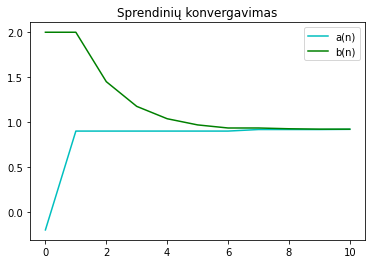

In [5]:
# Funkcijos grafikų braižymui
plt.plot(np.arange(len(a_vec)), a_vec, color='c')
plt.plot(np.arange(len(b_vec)), b_vec, color='g')
plt.legend(['a(n)', 'b(n)'])
plt.title("Sprendinių konvergavimas")
plt.show()